In [3]:
from data import process_wave_data
data_dir = "data/wave/20210712-161608"
process_wave_data(data_dir)

Time elapsed:  23.130995988845825


In [1]:
from process_data import process_data
process_data('data/wave/20210712-161608')

In [1]:
from data import data_wave
X_l, X_ul, Y_l, x_flat, y_flat, t_flat, p_flat = data_wave([1.0, 1.0, 1.0, 1.0, 1.0, 0.0])

Getting nx, ny, nodes from loaded data


In [4]:
import numpy as np
from matplotlib import cm
stuff = np.load('data/wave/dump000.npz')

def plot_data_dist(x,y):
    '''
    Plots flattened (1D) x, y arrays
    '''
    x_c, y_c = x_n[4::9], y_n[4::9]
    plt.scatter(x,y, s=0.1, alpha=0.3)
    plt.scatter(x_c,y_c, s=0.1, c='r')
    plt.show()
    #plt.savefig('test.png', dpi=1000)

def plot_heatmap(x,y,p):
    plt.figure(figsize=(8, 8))
    cmap = cm.get_cmap('Reds')
    plt.scatter(x,y, s=3.7, marker='s', c=p, cmap=cmap)
    plt.savefig('test.png', dpi=500)
    plt.show()

def load_data(dump_file):
    '''
    Loads data from dump file
    '''
    stuff = np.load(dump_file)
    u = stuff['u']
    v = stuff['v']
    p = stuff['p']
    x, y = stuff['xy'][:,0:18:2], stuff['xy'][:,1:18:2]
    x_n,y_n,p_n,u_n,v_n = x.flatten(), y.flatten(), p.flatten(), u.flatten(), v.flatten()
    return x_n,y_n,p_n,u_n,v_n

x,y,p,u,v = load_data('data/wave/dump500.npz')


FileNotFoundError: [Errno 2] No such file or directory: 'data/wave/dump000.npz'

In [5]:
params = [1.0, 1.0, 1.0, 1.0, 1.0, 0.0]
perc_int, perc_ext, perc_bound, perc_labeled_int, perc_labeled_ext, perc_labeled_bound = params
# Interior -- Exterior
# Labeled -- Unlabeled
# Mesh -- Random
# Boundary -- not boundary

In [2]:
def make_list_matrix(N, M):
    d = np.empty((N,M),object)
    for i in range(N):
        for j in range(M):
            d[i,j] = []
    return d

def get_delta(x):
    '''
    Gets step size of a list of grid values
    '''
    all_vals = np.sort(np.unique(x))
    dx = all_vals[1] - all_vals[0]
    x_min = all_vals[0]
    x_max = all_vals[-1]
    return dx, x_min, x_max

def point_to_index(x, dx, x_min):
    n = (x - x_min) / dx
    tol = 1e-3
    n_int = round(n)
    assert abs(n - n_int) < tol, f"x={n} isn't an integer in this grid scheme"
    n = n_int
    return n

def get_p_mat(p, x, y, dx, dy, x_min, y_min, N, M):
    p_mat = make_list_matrix(N,M)

    for x0,y0,p0 in zip(x,y,p):
        # x,y -> n,m
        n = point_to_index(x0, dx, x_min)
        m = point_to_index(y0, dy, y_min)
        # 
        p_mat[n,m].append(p0)

    avg = np.vectorize(lambda l: sum(l) / len(l))
    p_mat = avg(p_mat)

    return p_mat


In [12]:
tf = 5
dt = 0.002
T = int(tf / dt) + 1

2500

In [20]:
slice_size = len(x)
x_all, y_all, p_all, u_all, v_all = [np.zeros((T, slice_size)) for i in range(5)]
t_all = np.zeros(T)

for i in range(T): 
    dump_file = "data/wave/dump{:03d}.npz".format(i)
    x,y,p,u,v = load_data(dump_file)
    x_all[i, :] = x
    y_all[i, :] = y
    p_all[i, :] = p
    u_all[i, :] = u
    v_all[i, :] = v
    t_all[i] = dt * i

In [30]:
x = x_all.flatten()
y = y_all.flatten()
p = p_all.flatten()
u = u_all.flatten()
v = v_all.flatten()
t = np.repeat(t_all, slice_size)

In [31]:
t.shape, x.shape, y.shape

((56250000,), (56250000,), (56250000,))

In [3]:
data = np.stack([x,y,t,p,u,v], axis=-1)

NameError: name 'np' is not defined

In [2]:
np.random.permutation(len(data))

NameError: name 'np' is not defined

In [54]:
is_interior = (t <= 1)
is_labeled = is_interior
inputs = np.stack([x,y,t], axis=-1)
outputs = np.stack([p], axis=-1)
np.savez('data/wave/sim_data', inputs=inputs, outputs=outputs)

In [55]:
loaded = np.load('data/wave/sim_data.npz')

In [56]:
loaded['inputs'].shape

(56250000, 3)

In [47]:
# x, y, t = data.unstack()
is_interior = (t <= 1)
is_boundary = (x == 0) | (x == 1) | (y == 0) | (y == 1)
data_int = data[is_interior & ~is_boundary]
data_ext = data[~is_interior & ~is_boundary]
data_bound = data[is_boundary]

In [44]:
def random_rows(data, perc):
    num = len(data) * perc
    idx = np.random.choice(len(data), num)
    return data[idx]

sampled_data_int = random_rows(data_int, perc_int)
sampled_data_ext = random_rows(data_ext, perc_ext)
sampled_data_bound = random_rows(data_bound, perc_bound)



56250000

In [14]:
def interior(data):
    x, y, t = data
    cond = (t <= 1)
    return data[cond]

def exterior(data):
    x, y, t = data
    return t > 1

def boundary(data):
    x, y, t = data
    return x == 0 or x == 1 or y == 0 or y == 1

is_interior()
# (2500, 22500) -> (2500 * 22500)

(2500, 22500)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

cmap = sns.color_palette("coolwarm", as_cmap=True)

p_mat_list = []

for t in range(0, 5*500, 30): 
    dump_file = "data/wave/dump{:03d}.npz".format(t)
    x,y,p,u,v = load_data(dump_file)

    dx, x_min, x_max = get_delta(x)
    dy, y_min, y_max = get_delta(y)

    N = point_to_index(x_max, dx, x_min) + 1
    M = point_to_index(y_max, dy, y_min) + 1
    
    p_mat = get_p_mat(p, x, y, dx, dy, x_min, y_min, N, M)
    p_mat_list.append(p_mat)

    # sns.heatmap(p_mat, vmax=.8, square=True, cbar=True, center=0.00, cmap=cmap)
    # plt.show()

In [5]:
p_mat = p_mat_list[40]
sns.heatmap(p_mat, square=True, cbar=True, vmin = -2, vmax= 2, center=0.00, cmap=cmap)

IndexError: list index out of range

In [8]:
plt.imshow(p_mat, cmap='seismic', interpolation='nearest')
# Colorbar
# Movie

<IPython.core.display.Javascript object>

In [191]:
sns.palplot(sns.diverging_palette(h_neg=240, h_pos=10, s=100, n=50, center="light"))

<IPython.core.display.Javascript object>

In [4]:
%matplotlib notebook
from IPython.display import HTML

import seaborn as sns
from matplotlib import animation

fig = plt.figure()
cmap = sns.color_palette("coolwarm", as_cmap=True)

def animate(i):
    sns.heatmap(p_mat_list[i],  vmin = -3, vmax= 3, square=True, cbar=False, center=0.00, cmap=cmap)

anim = animation.FuncAnimation(fig, animate, frames=len(p_mat_list), repeat = False)
#HTML(anim.to_html5_video())

savefile = r"test.gif"
pillowwriter = animation.PillowWriter(fps=5)
anim.save(savefile, writer=pillowwriter)

# anim.save('test.gif', writer='imagemagick', fps=30)

#cmap = sns.color_palette("coolwarm", as_cmap=True)
#cmap = sns.diverging_palette(h_neg=240, h_pos=10, s=100, n=50, center="light", as_cmap=True)
#sns.color_palette("vlag", as_cmap=True)
#sns.heatmap(p_mat, vmax=.8, square=True, cbar=True, center=0.00, cmap=cmap)

<IPython.core.display.Javascript object>

In [104]:
dx, x_min, x_max = get_delta(x)
dy, y_min, y_max = get_delta(y)

N = point_to_index(x_max, dx, x_min)
M = point_to_index(y_max, dy, y_min)

p_mat = make_list_matrix(N,M)

for x,y,p in zip(x,y,p):
    # x,y -> n,m
    n = point_to_index(x, dx, x_min)
    m = point_to_index(y, dy, y_min)
    # 
    p_mat[n,m].append(p)
    

AssertionError: x isn't an integer in this grid scheme

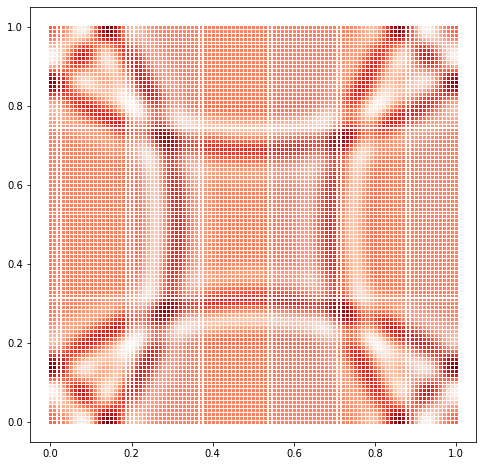

In [67]:
x,y,p,u,v = load_data('data/wave/dump500.npz')
plot_heatmap(x,y,p)

In [12]:
list(stuff.keys())

['p', 'u', 'v', 'xy']

In [7]:
stuff['p'].shape

(2500, 9)

In [34]:
u = stuff['u']
v = stuff['v']

In [10]:
stuff['xy'].shape

(2500, 18)

In [32]:
p = stuff['p']

In [14]:
stuff['xy'][0]

array([0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.  , 0.01, 0.01, 0.01, 0.02,
       0.01, 0.  , 0.02, 0.01, 0.02, 0.02, 0.02], dtype=float32)

((2500, 9), (2500, 9))

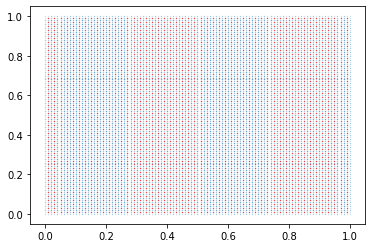

In [27]:
x, y = stuff['xy'][:,0:18:2], stuff['xy'][:,1:18:2]
x_c, y_c = stuff['xy'][:, 8], stuff['xy'][:, 9]
plt.scatter(x,y, s=0.1, alpha=0.3)
plt.scatter(x_c,y_c, s=0.1, c='r')
plt.savefig('test.png', dpi=1000)

In [36]:
x.shape, y.shape, p.shape, u.shape, v.shape

((2500, 9), (2500, 9), (2500, 9), (2500, 9), (2500, 9))

In [38]:
x_n,y_n,p_n,u_n,v_n = x.flatten(), y.flatten(), p.flatten(), u.flatten(), v.flatten()

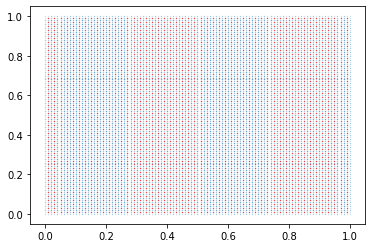

In [42]:
x_c, y_c = x_n[4::9], y_n[4::9]
plt.scatter(x,y, s=0.1, alpha=0.3)
plt.scatter(x_c,y_c, s=0.1, c='r')
plt.savefig('test.png', dpi=1000)

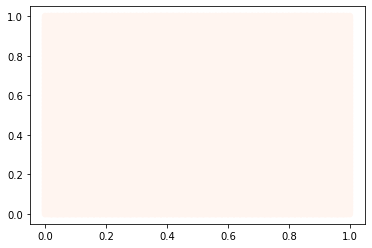

In [45]:
from matplotlib import cm
cmap = cm.get_cmap('Reds')
plt.scatter(x,y, c=p, cmap=cmap)

In [ ]:
#       p, u, v,      xy          ->  (x,y,t)         (p,u,v)
# T x   (N*M, 9)     (N*M, 9*2)      (9*N*M*T, 3)     (9*N*M*T, 3)

In [2]:
import tensorflow as tf
#max(tf.squeeze(p_flat))
t_flat

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [13]:
X_l.shape

(2750, 3)

In [14]:
import tensorflow as tf

In [7]:
t_vals = tf.sort(list(tf.unique(X_l[:,2]))[0])

Time 0.0


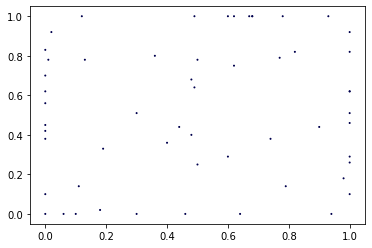

Time 0.019999999552965164


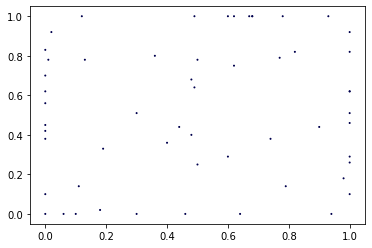

Time 0.03999999910593033


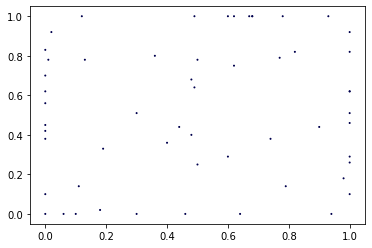

Time 0.05999999865889549


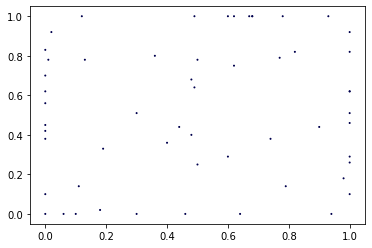

Time 0.07999999821186066


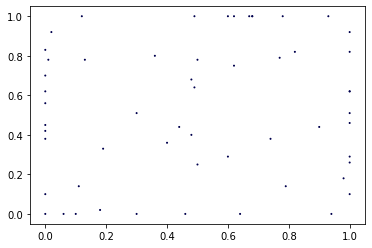

Time 0.10000000149011612


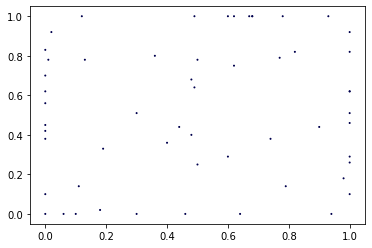

Time 0.11999999731779099


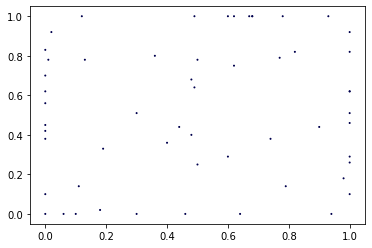

Time 0.14000000059604645


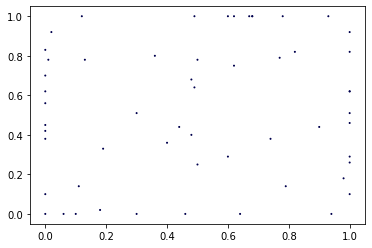

Time 0.1599999964237213


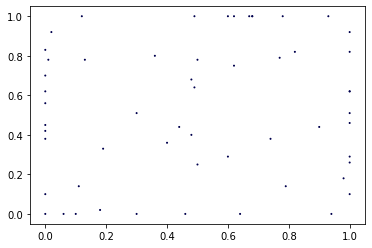

Time 0.18000000715255737


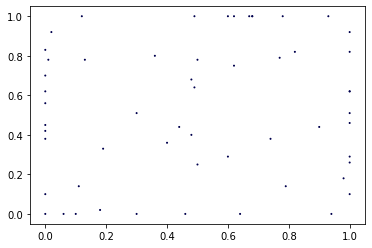

Time 0.20000000298023224


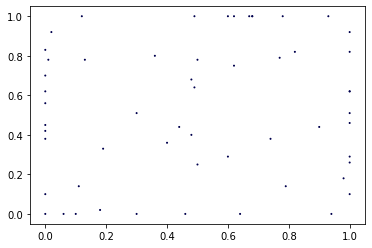

Time 0.2199999988079071


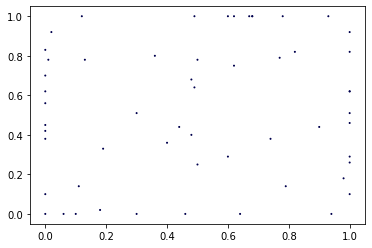

Time 0.23999999463558197


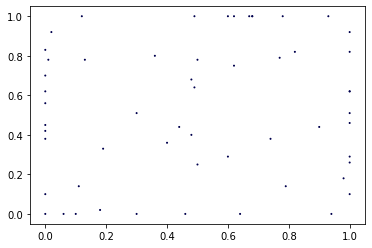

Time 0.25999999046325684


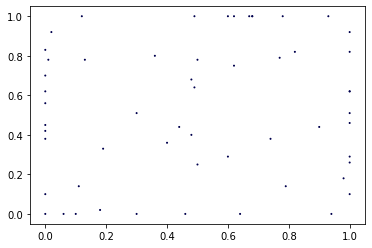

Time 0.2800000011920929


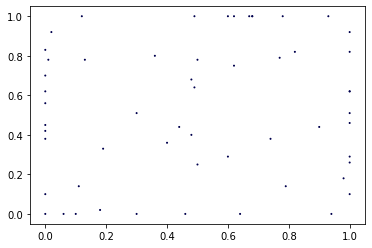

Time 0.30000001192092896


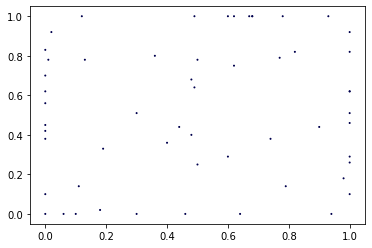

Time 0.3199999928474426


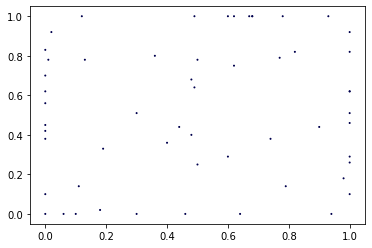

Time 0.3400000035762787


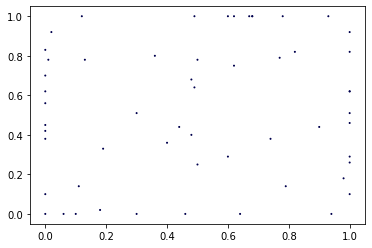

Time 0.36000001430511475


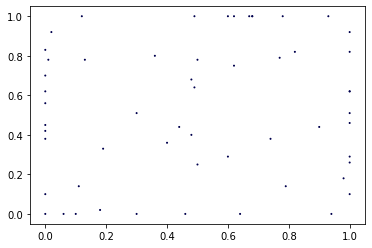

Time 0.3799999952316284


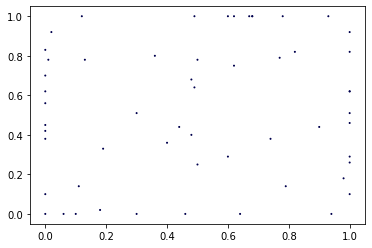

Time 0.4000000059604645


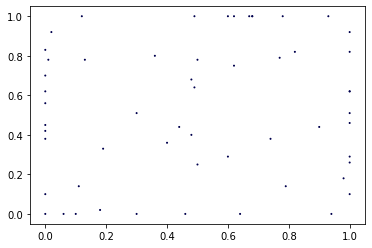

Time 0.41999998688697815


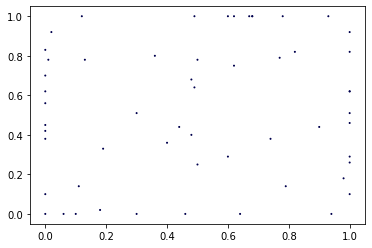

Time 0.4399999976158142


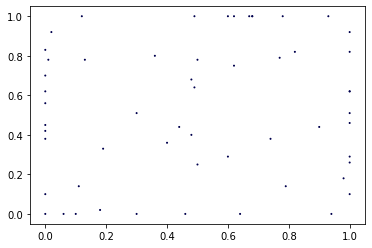

Time 0.46000000834465027


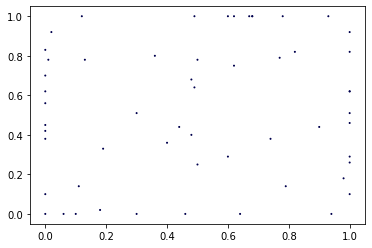

Time 0.47999998927116394


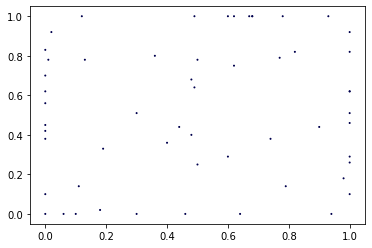

Time 0.5


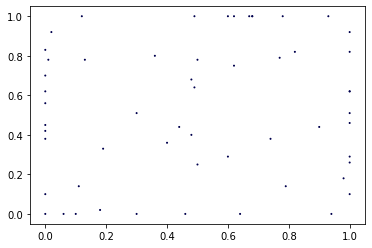

Time 0.5199999809265137


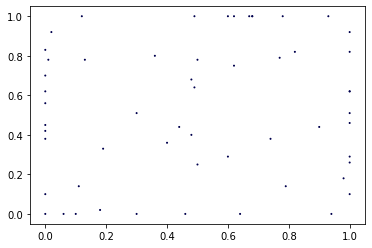

Time 0.5400000214576721


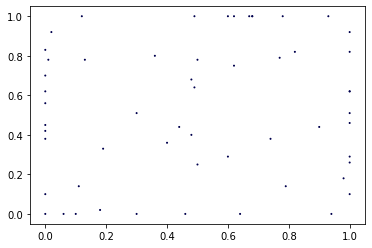

Time 0.5600000023841858


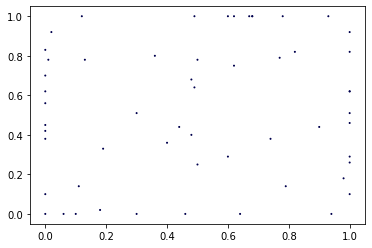

Time 0.5799999833106995


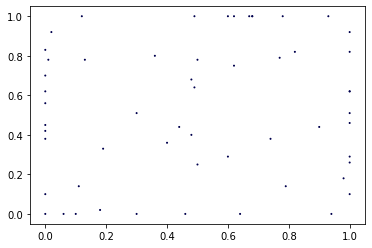

Time 0.6000000238418579


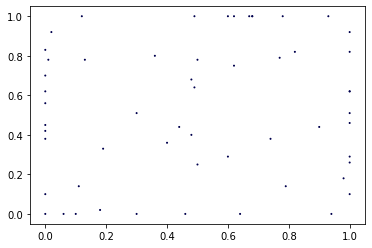

Time 0.6200000047683716


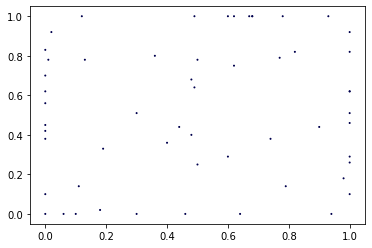

Time 0.6399999856948853


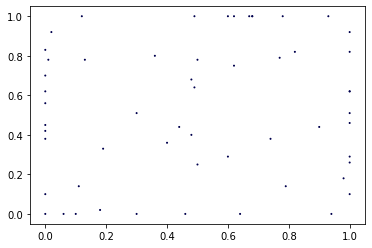

Time 0.6600000262260437


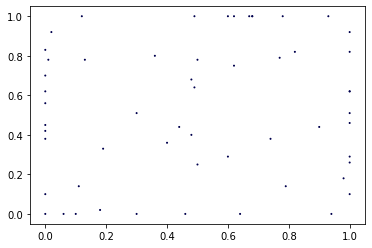

Time 0.6800000071525574


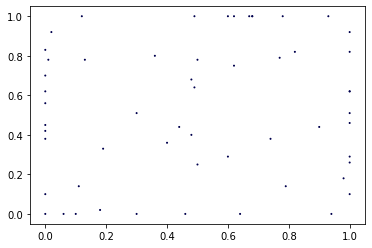

Time 0.699999988079071


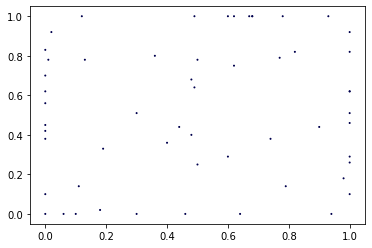

Time 0.7200000286102295


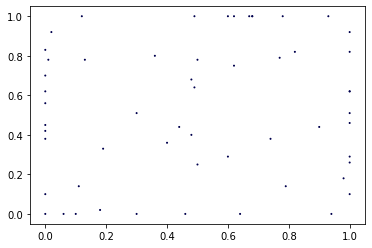

Time 0.7400000095367432


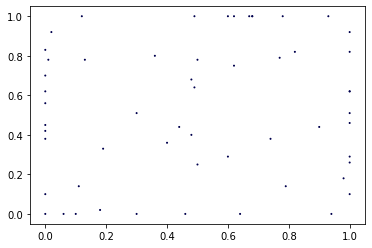

Time 0.7599999904632568


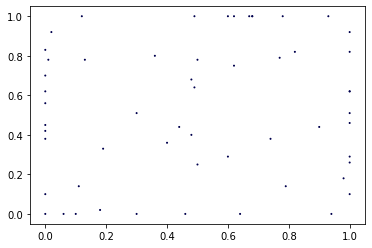

Time 0.7799999713897705


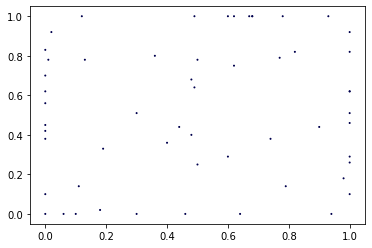

Time 0.800000011920929


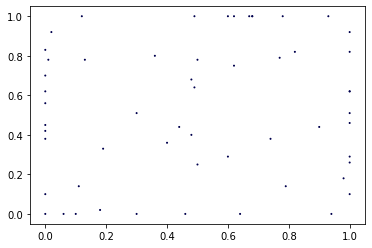

Time 0.8199999928474426


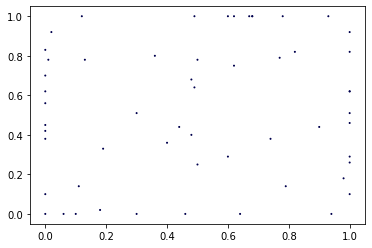

Time 0.8399999737739563


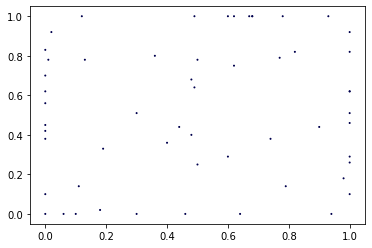

Time 0.8600000143051147


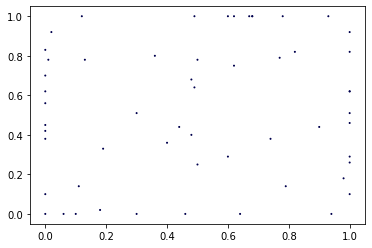

Time 0.8799999952316284


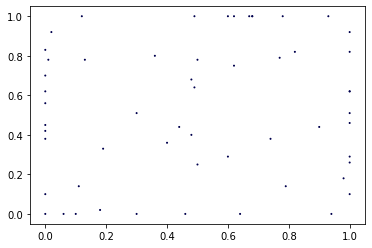

Time 0.8999999761581421


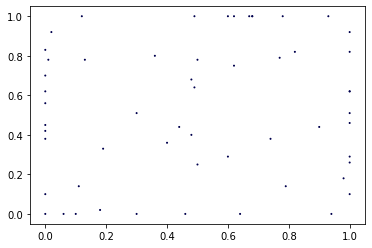

Time 0.9200000166893005


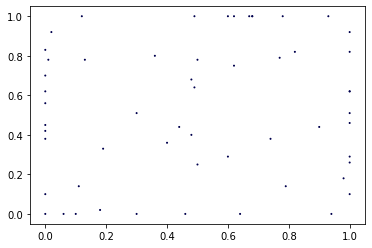

Time 0.9399999976158142


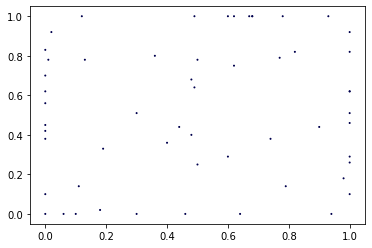

Time 0.9599999785423279


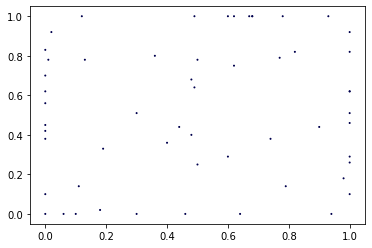

Time 0.9800000190734863


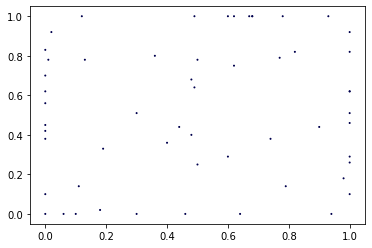

Time 1.0


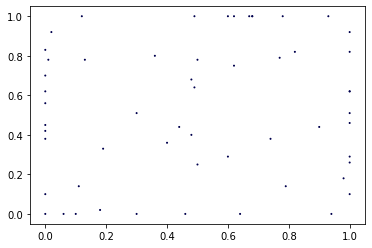

Time 1.0199999809265137


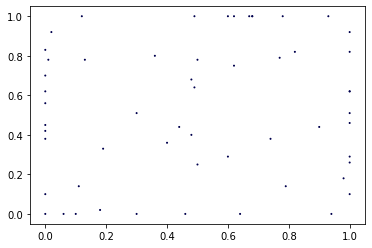

Time 1.0399999618530273


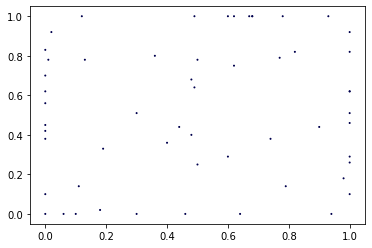

Time 1.059999942779541


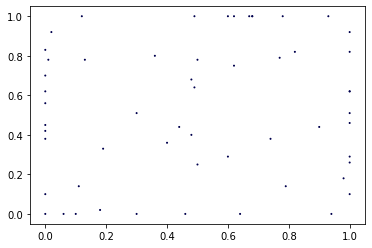

Time 1.0800000429153442


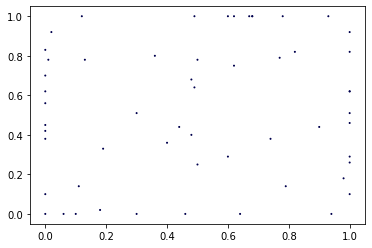

Time 1.100000023841858


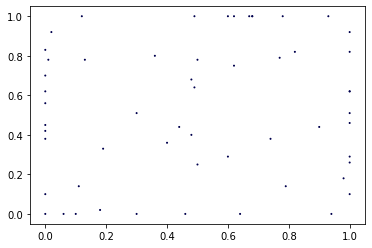

Time 1.1200000047683716


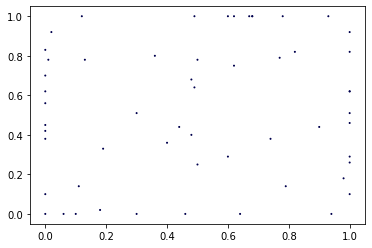

Time 1.1399999856948853


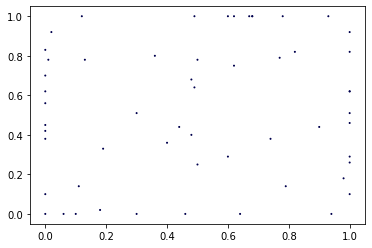

Time 1.159999966621399


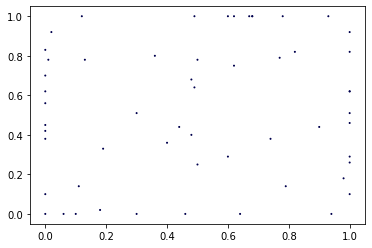

Time 1.1799999475479126


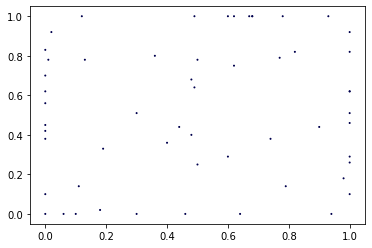

Time 1.2000000476837158


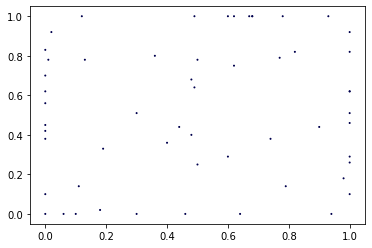

Time 1.2200000286102295


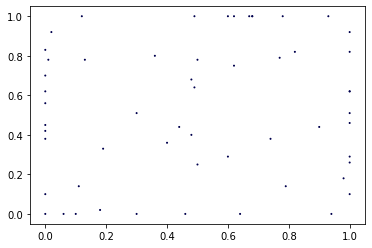

Time 1.2400000095367432


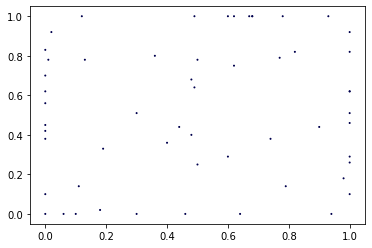

Time 1.2599999904632568


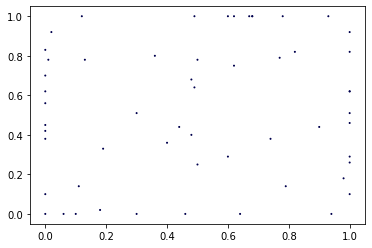

Time 1.2799999713897705


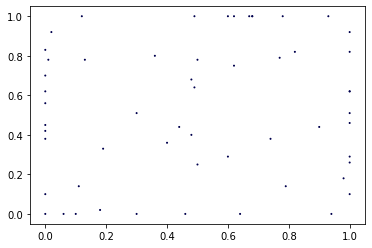

Time 1.2999999523162842


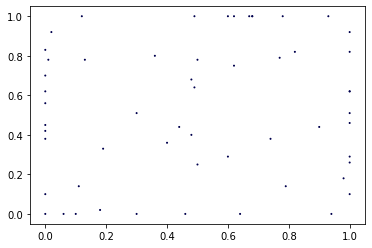

Time 1.3200000524520874


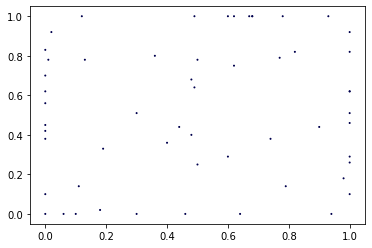

Time 1.340000033378601


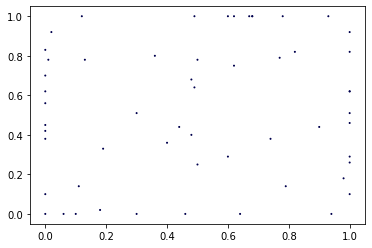

Time 1.3600000143051147


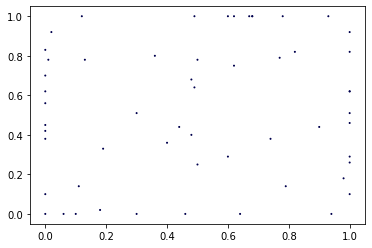

Time 1.3799999952316284


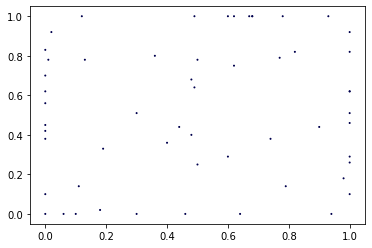

Time 1.399999976158142


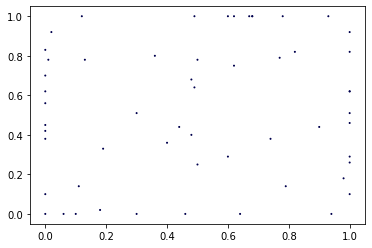

Time 1.4199999570846558


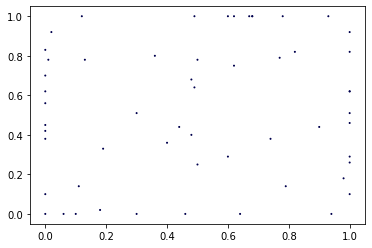

Time 1.440000057220459


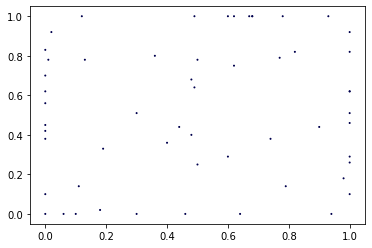

Time 1.4600000381469727


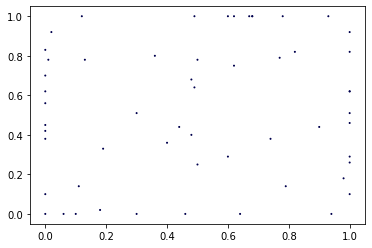

Time 1.4800000190734863


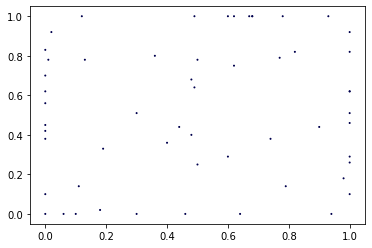

Time 1.5


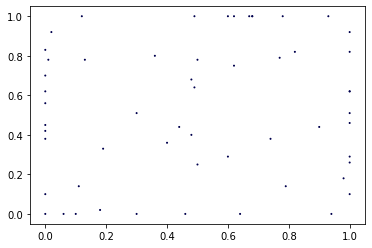

Time 1.5199999809265137


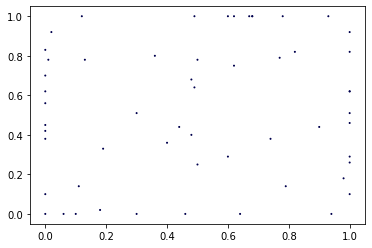

Time 1.5399999618530273


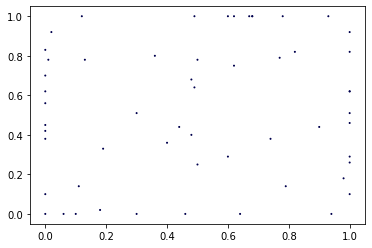

Time 1.559999942779541


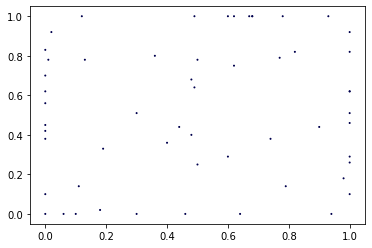

Time 1.5800000429153442


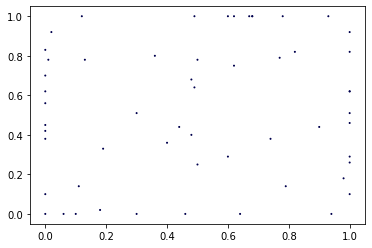

Time 1.600000023841858


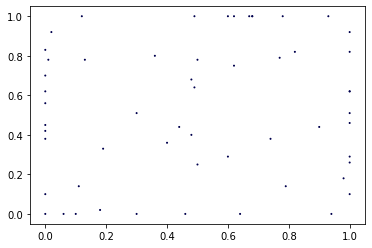

Time 1.6200000047683716


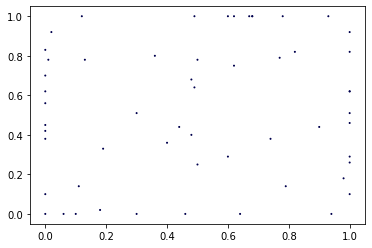

Time 1.6399999856948853


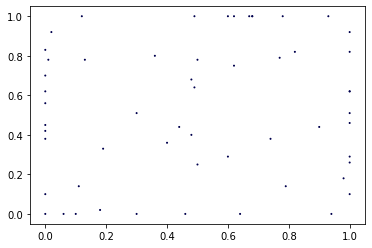

Time 1.659999966621399


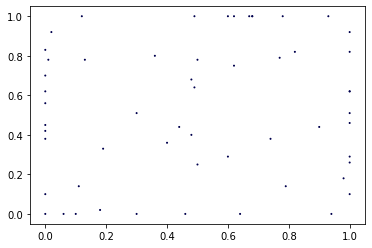

Time 1.6799999475479126


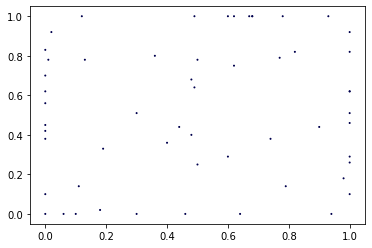

Time 1.7000000476837158


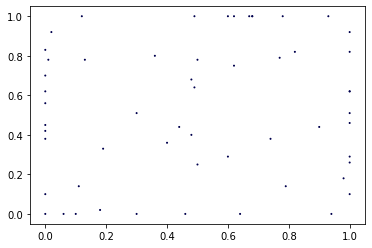

Time 1.7200000286102295


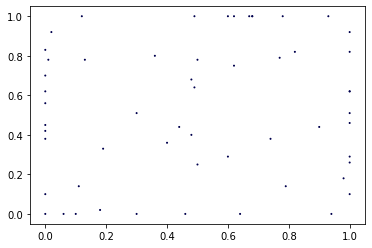

Time 1.7400000095367432


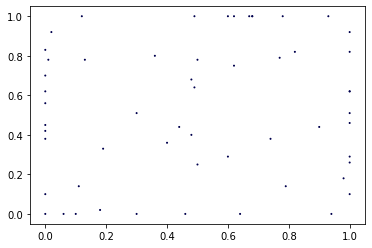

Time 1.7599999904632568


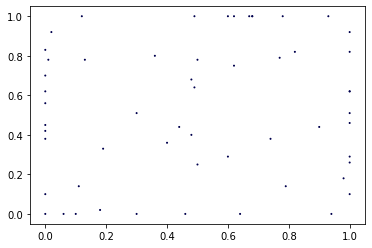

Time 1.7799999713897705


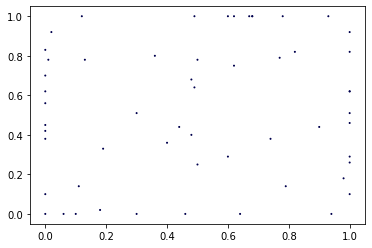

Time 1.7999999523162842


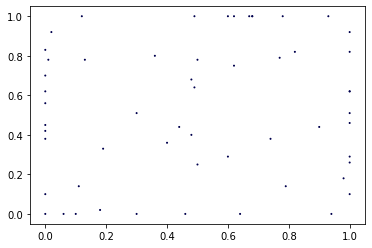

Time 1.8200000524520874


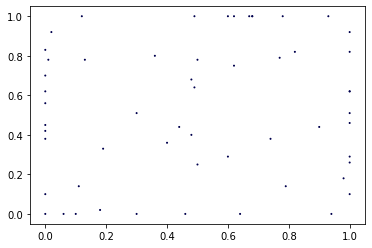

Time 1.840000033378601


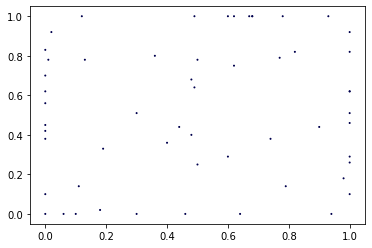

Time 1.8600000143051147


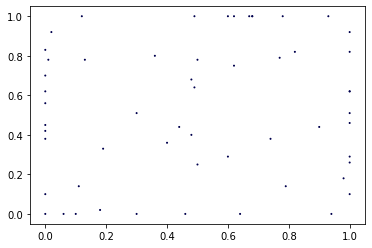

Time 1.8799999952316284


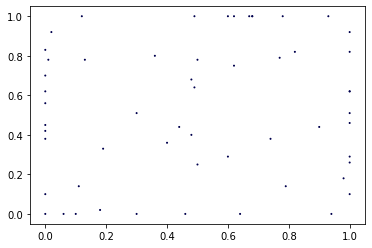

Time 1.899999976158142


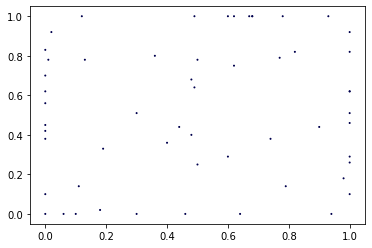

Time 1.9199999570846558


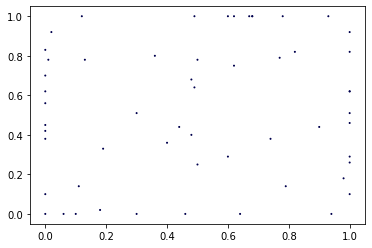

Time 1.940000057220459


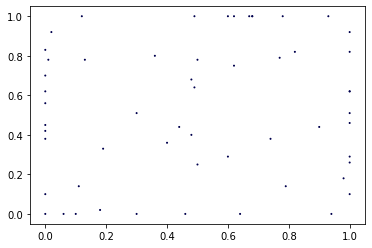

Time 1.9600000381469727


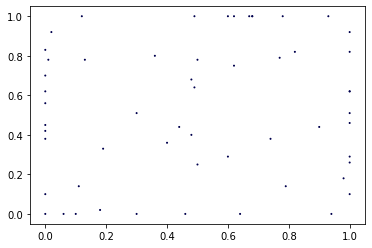

Time 1.9800000190734863


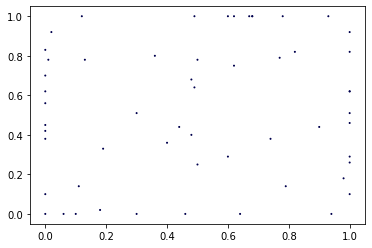

In [9]:
import matplotlib
import matplotlib.cm
import matplotlib.pyplot as plt
cmap = matplotlib.cm.get_cmap('seismic')

for t in t_vals:
    print("Time", float(t))
    list(tf.unique(X_l[:,2]))[0]
    idx = tf.where( X_l[:,2] == 0 )
    idx = tf.squeeze(idx)
    x,y,t = tf.unstack(X_l[idx], axis=1)
    colors = Y_l[idx]
    colors = tf.squeeze(colors)
    plt.scatter(x,y, s=1, c=colors, cmap=cmap)
    plt.show()

In [4]:
from matplotlib import cm

In [5]:
import matplotlib
cmap = cm.get_cmap('seismic')

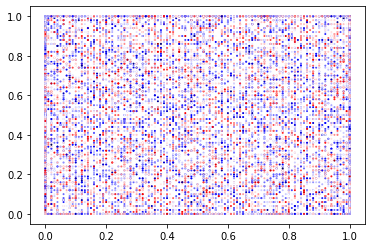

In [159]:
list(tf.unique(X_l[:,2]))[0]
idx = tf.where( X_l[:,2] == 0 )
idx = tf.squeeze(idx)
x,y,t = tf.unstack(X_l[idx], axis=1)
colors = Y_l[idx]
colors = tf.squeeze(colors)
import numpy as np
colors = 1000 * np.random.randn(*colors.numpy().shape)
plt.scatter(x,y, s=1, c=colors, cmap=cmap)

In [178]:
t_vals = tf.sort(list(tf.unique(tf.squeeze(t_flat)))[0])
t_vals

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.02, 1.04, 1.06, 1.08,
       1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 , 1.22, 1.24, 1.26, 1.28, 1.3 ,
       1.32, 1.34, 1.36, 1.38, 1.4 , 1.42, 1.44, 1.46, 1.48, 1.5 , 1.52,
       1.54, 1.56, 1.58, 1.6 , 1.62, 1.64, 1.66, 1.68, 1.7 , 1.72, 1.74,
       1.76, 1.78, 1.8 , 1.82, 1.84, 1.86, 1.88, 1.9 , 1.92, 1.94, 1.96,
       1.98], dtype=float32)>

In [124]:
# Convert to heatmap
matrix = tf.zeros([100, 100])
shape = tf.shape(matrix)
R, C = tf.meshgrid(tf.range(shape[0]), tf.range(shape[1]), indexing='ij')
R

<tf.Tensor: shape=(100, 100), dtype=int32, numpy=
array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 2,  2,  2, ...,  2,  2,  2],
       ...,
       [97, 97, 97, ..., 97, 97, 97],
       [98, 98, 98, ..., 98, 98, 98],
       [99, 99, 99, ..., 99, 99, 99]], dtype=int32)>

In [89]:
plt.imshow(a, cmap='hot', interpolation='nearest')

AttributeError: module 'matplotlib.pyplot' has no attribute 'heat'